# Analysis of computer games

**Цель исследования** - выявить определяющие успешность игры закономерности. Cделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования** - информацию о продажах компьютерных игр до 2016 в интернет-магазине «Стримчик» мы получили из общедоступных источников данных. В файле отражена информация о проданных играх, оценках экспертов и критиков, жанре, платформах. О качестве данных ничего не известно, поэтому перед началом исследования следует провести обзор данных на предмет ошибок и их влияния на результат исследования. Затем, на этапе предобработки следует скорректировать ошибки, которые являются критическими. Далее провести анализ показателей, требующихся для исследования и расчитать недостающие и добавить их в общую таблицу. 

**Проверить гипотезы** о том,что:

-	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
-	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 

Этапы исследования:
1. [Изучение данных из файла](#general_id)
2. [Предобработка данных](#preprocessing_id)
    2.1.[Переименование столбцов](#preprocessing_one_id)
    2.2.[Обработка пропусков](#preprocessing_two_id)
    2.3.[Замена типа данных](#preprocessing_three_id)
    2.4.[Определение актуального периода](#preprocessing_four_id)
    2.5.[Проверка допустимых значений](#preprocessing_five_id)
3. [Исследовательский анализ данных](#analysis_id)
5. [Общий вывод](#conclusion_id)


## Изучение данных из файла
<a id=general_id></a>

In [72]:
import pandas as pd
from pymystem3 import Mystem
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
russian_stemmer = SnowballStemmer('russian')
pd.set_option('display.float_format', '{:,.2f}'.format)
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
from scipy.stats import norm
from scipy import stats as st
import matplotlib.ticker as ticker
import plotly.express as px

In [73]:
data = pd.read_csv('/datasets/games.csv')

Создадим функцию research для изучения данных в таблице.

In [74]:
def research (data):
    data.info(memory_usage='deep')
    display(data.head(10))
    display(data.describe())
    print('Количество дубликатов',data.duplicated().sum())

In [75]:
research(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 5.6 MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


Количество дубликатов 0


**Описание данных:**
-	`Name` — название игры
-	`Platform` — платформа
-	`Year_of_Release` — год выпуска
-	`Genre` — жанр игры
-	`NA_sales` — продажи в Северной Америке (миллионы проданных копий)
-	`EU_sales` — продажи в Европе (миллионы проданных копий)
-	`JP_sales` — продажи в Японии (миллионы проданных копий)
-	`Other_sales` — продажи в других странах (миллионы проданных копий)
-	`Critic_Score` — оценка критиков (максимум 100)
-	`User_Score` — оценка пользователей (максимум 10)
-	`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Вывод

Дубликатов в датасете не обнаружено.
В таблице представлена информация о продаже компьютерных игр с 1980 по 2016 год.
На этапе проверки допустимых значений требуется изучить уникальность значений в колонках `Name`,`Platform`,`Genre`,`Rating`

При изучении датасета были выявлены следующие ошибки:
- Наименование столбцов. Требуется привести наименования столбцов к нижнему регистру;
- Пропуски. В таблице 16715 строк. Требуется выяснить природу возникновения пропущенных значений и по тем позициям,где это уместно,выполнить замену пропущенных значений. Пропуски выявлены по столбцам `Name`,`Year_of_Release`,`Genre`,`Critic_Score`,   `User_Score`,`Rating`.
- Тип данных. Изменить тип данных в колонке `Year_of_Release` на тип данных дата, изменить на числовой тип данных значения в колонке `User_Score`.

## Предобработка данных

### Переименование столбцов
<a id="preprocessing_one_id"></a>

Приведем в порядок наименование используемых столбцов таблицы и выведем результат на экран.

In [76]:
data = data.rename(columns={'Name':'name','Platform':'platform','Year_of_Release':'year_of_release','Genre':'genre','NA_sales':'na_sales','EU_sales':'ea_sales','JP_sales':'jp_sales','Other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'})
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
ea_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод**

Для приведения данных к единообразию все наименования столбцов были приведены к нижнему регистру.

### Обработка пропусков
<a id="preprocessing_two_id"></a>

In [77]:
def nan_values(df):
    count_missing = df.isna().sum()
    percent_missing = round(df.isna().sum() * 100 / len(df), 2)
    
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'num_missing': count_missing,
                                     'percent_missing': percent_missing})
    
    return missing_value_df

In [78]:
nan_values(data)

,column_name,num_missing,percent_missing
name,name,2,0.01
platform,platform,0,0.00
year_of_release,year_of_release,269,1.61
genre,genre,2,0.01
na_sales,na_sales,0,0.00
ea_sales,ea_sales,0,0.00
jp_sales,jp_sales,0,0.00
other_sales,other_sales,0,0.00
critic_score,critic_score,8578,51.32
user_score,user_score,6701,40.09


Проверим нулевые значения по колонкам name, genre.

In [79]:
display(data[data['name'].isna()])
display(data[data['genre'].isna()])


,name,platform,year_of_release,genre,na_sales,ea_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN


,name,platform,year_of_release,genre,na_sales,ea_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN


Восстановить информацию о жанре и наименовании игры не представляется возможным,поэтому удалим строки.

In [80]:
data.dropna(subset=['name'],inplace=True)

Проверим возможность определения года по наименованию платформы.

In [81]:
data.pivot_table(index='platform', values='year_of_release', aggfunc=['min','max'])

,min,max
,year_of_release,year_of_release
platform,,
2600,"1,980.00","1,989.00"
3DO,"1,994.00","1,995.00"
3DS,"2,011.00","2,016.00"
DC,"1,998.00","2,008.00"
DS,"1,985.00","2,013.00"
GB,"1,988.00","2,001.00"
GBA,"2,000.00","2,007.00"
GC,"2,001.00","2,007.00"


In [82]:
year = data[data['year_of_release'].isna()]
year.pivot_table(index='platform',aggfunc=['count'])

count                                                    \
         critic_score ea_sales genre jp_sales na_sales name other_sales   
platform                                                                  
2600                0       17    17       17       17   17          17   
3DS                 2        8     8        8        8    8           8   
DS                  9       30    30       30       30   30          30   
GB                  0        1     1        1        1    1           1   
GBA                 8       11    11       11       11   11          11   
GC                 11       14    14       14       14   14          14   
N64                 0        3     3        3        3    3           3   
PC                 16       17    17       17       17   17          17   
PS                  4        7     7        7        7    7           7   
PS2                23       34    34       34       34   34          34   
PS3                16       25    25       25       25   25          25   
PSP                 6       16    16       16       16   16          16   
PSV                 1        1     1        1        1    1           1   
Wii                17       34    34       34       34   34          34   
X360               22       30    30       30       30   30          30   
XB                 19       21    21       21       21   21          21   

                                            
         rating user_score year_of_release  
platform                                    
2600          0          0               0  
3DS           5          5               0  
DS           18         16               0  
GB            0          0               0  
GBA           8          8               0  
GC           12         12               0  
N64           0          0               0  
PC           17         15               0  
PS            4          4               0  
PS2          25         25               0  
PS3          17         16               0  
PSP           8          8               0  
PSV           1          1               0  
Wii          25         24               0  
X360         22         22               0  
XB           19         19               0

По тем платформам где больше всего пропусков по столбцу год разброс показателей довольно большой и определить год затруднительно. Поэтому удалим строки,где отсутствует значение года (так как речь идеть лишь о 1,6 процентах данных)

In [83]:
data.dropna(subset=['year_of_release'],inplace=True)

Изучим пропуски по столбцу critic_score.

In [84]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Возможно пропуски образовались по тем позициям,где отсутствует оценка экспертов. Проверим столбец user_score.

In [85]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [86]:
print(data[data['user_score']=='tbd'])

                                 name platform  year_of_release       genre  \
119                     Zumba Fitness      Wii         2,010.00      Sports   
301    Namco Museum: 50th Anniversary      PS2         2,005.00        Misc   
520                   Zumba Fitness 2      Wii         2,011.00      Sports   
645                      uDraw Studio      Wii         2,010.00        Misc   
718                   Just Dance Kids      Wii         2,010.00        Misc   
...                               ...      ...              ...         ...   
16695                 Planet Monsters      GBA         2,001.00      Action   
16697                Bust-A-Move 3000       GC         2,003.00      Puzzle   
16698                Mega Brain Boost       DS         2,008.00      Puzzle   
16704                        Plushees       DS         2,008.00  Simulation   
16706   Men in Black II: Alien Escape       GC         2,003.00     Shooter   

       na_sales  ea_sales  jp_sales  other_sales  c

TBD «to be determined» переводится как будет определен, скорее всего это те позиции по которым оценка еще не определена. В таком случаем мы можем заменить на nan. Посмотрим много ли 0 в данной ячейке?

In [87]:
print(data[data['user_score']=='0'])

                                    name platform  year_of_release      genre  \
2835  My Little Pony: Pinkie Pie's Party       DS         2,008.00  Adventure   

      na_sales  ea_sales  jp_sales  other_sales  critic_score user_score  \
2835      0.66      0.00      0.00         0.06           nan          0   

     rating  
2835      E  


Предположим,что 0 и tbd возникли в строках без оценки. Заменим 0 и значения tbd на nan.

In [88]:

data['user_score'] = data['user_score'].replace('tbd','nan')
data['user_score'] = data['user_score'].replace('0','nan')


In [89]:
data['rating'].unique
data['rating']=data['rating'].fillna('unknown')

Определить значение рейтинга по отсутствующим значениям не представляется возможным, поэтому предположим,что значения "nan" образовались там,где рейтинг не определен и в данном случае заменим значение на "unknown".

**Вывод**

В таблице были выявлены пропущенные значения в столбцах:

1.Name и Genre.
При изучении данных было выявлено 2 строки с пропусками по столбцам с именем и жанром.
Так как количество пропущенных значений 0.01% и определить пропущенные элементы невозможно вышеуказанные строки были удалены.

2.Year_of_Release.
В колонке с годом выпуска игры пропущено 1.61% значений. Было предположение,что информацию по году можно восстановить исходя из наименования платформы, но так как большинство платформ действуют в большой промежуток времени,опеределить год не представляется возможным и строки с пропусками были удалены.

3.Critic_Score,User_Score,Rating
Самое большое количество пропусков выявлено по столбцу с рейтингом критиков (51.32%)
40% пропусков по столбцам User_Score и Rating.
Вернемся к вопросу пропусков по вышеуказанным колонка после определения интересующего нас периода. Возможно в необходимом периоде их будет меньше.

### Замена типа данных
<a id="preprocessing_three_id"></a>

In [90]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
ea_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             16444 non-null object
dtypes: float64(6), object(5)
memory usage: 6.1 MB


Заменим тип данных по колонке year_of_release на int и user_score на float ,а также оптимизируем потребляемую память.

In [91]:
data['year_of_release']= data['year_of_release'].astype('int32')
data['user_score']=data['user_score'].astype('float32')


for dtype in ['int']:
    selected_dtype = data.select_dtypes(include=[dtype])
    selected_dtype_column = selected_dtype.columns
    for i in selected_dtype_column:
        data[i] = data[i].astype('int32')

for dtype in ['float']:
    selected_dtype = data.select_dtypes(include=[dtype])
    selected_dtype_column = selected_dtype.columns
    for i in selected_dtype_column:
        data[i] = data[i].astype('float32')

data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int32
genre              16444 non-null object
na_sales           16444 non-null float32
ea_sales           16444 non-null float32
jp_sales           16444 non-null float32
other_sales        16444 non-null float32
critic_score       7983 non-null float32
user_score         7462 non-null float32
rating             16444 non-null object
dtypes: float32(6), int32(1), object(4)
memory usage: 5.0 MB


**Вывод**

Для того,чтобы было легче производить анализ мы избавились от ненужных нулей и запятых,изменив тип данных с float на int по столбцу year_of_release. Далее был установлен формат float для колонки с рейтингом пользователя и сократили объем потребляемой памяти изменив тип данных с 64 на 32.

### Определение актуального периода. 
<a id="preprocessing_four_id"></a>

Возьмемся за определение актуального периода и ответим на заданные вопросы:
- Изучить сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Изучить платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Изучить данные за соответствующий актуальный период. Определить актуальный период в результате исследования предыдущих вопросов.Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

Изучим сколько игр выпускалось в разные годы.

Text(0.5, 1.0, 'Количество выпущенных игр по году выпуска, шт.')

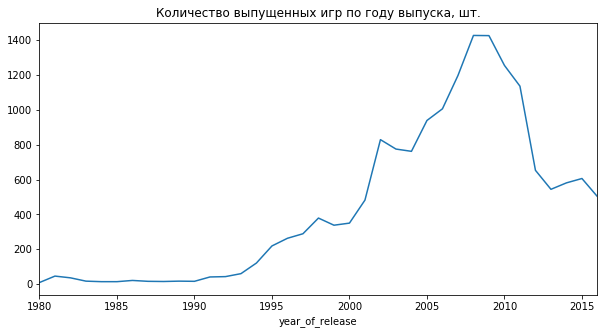

In [92]:
data.groupby('year_of_release')['name'].count().plot(figsize=(10,5))
plt.xlim(1980, 2016)
plt.title("Количество выпущенных игр по году выпуска, шт.")


In [93]:
display(data.groupby('year_of_release')['name'].count())

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Исходя из графика и таблице по количеству выпущенных игр можно сделать вывод, пик по количеству игр приходится на 2009-2012 года.

Изучим,какие года относятся к выбросам.

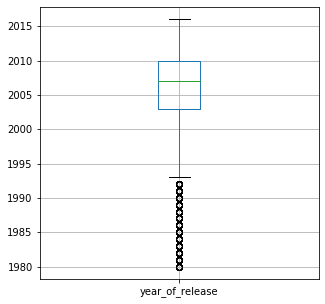

In [94]:
ax=data.boxplot(column='year_of_release')


На основании графика выше скорректируем рассматриваемый период с 1993-2016 год.

Создадим функцию для отбора выбросов с помощью межквартильного размаха.


In [95]:
def emissions(data, field):
    
    before_size = len(data[field])
    q1, q3 = data[field].quantile(0.25), data[field].quantile(0.75)
    iqr = q3-q1
    data = data.query(f'@q1 - 1.5*@iqr < {field} and @q3 + 1.5*@iqr > {field}')
    after_size = len(data[field])
    percent_part = (before_size - after_size)/before_size
    print(q1-1.5*iqr,q3+1.5*iqr)
    print(f'Удалено выбросов: {before_size - after_size} ({percent_part:.1%})')

In [96]:
emissions(data,'year_of_release')

1992.5 2020.5
Удалено выбросов: 305 (1.9%)


In [97]:
data['year_of_release']=data['year_of_release'].astype('int32')

Добавим сумму выручки по каждой игре для дальнейшего изучения платформ с наибольшими суммарными продажами и построим распределение по годам.

In [98]:
data['sales']=data['na_sales']+data['ea_sales']+data['jp_sales']+data['other_sales']


Сгруппируем таблицу по платформам и выведем общую сумму выручки по каждой платформе.

In [99]:
data_platform=data.groupby('platform').sum()
data_top_platform = data_platform.sort_values(by='sales',ascending=False)
display(data_top_platform.head())

,year_of_release,na_sales,ea_sales,jp_sales,other_sales,critic_score,user_score,sales
platform,,,,,,,,
PS2,4263750,572.92,332.63,137.54,190.47,"87,611.00","9,302.90","1,233.56"
X360,2476173,595.74,268.32,12.30,84.88,"61,405.00","6,313.30",961.24
PS3,2626158,390.13,327.21,79.41,134.59,"56,657.00","5,785.50",931.34
Wii,2583531,486.87,258.32,68.28,77.71,"35,658.00","3,692.40",891.18
DS,4259361,380.31,188.41,175.02,59.04,"45,120.00","3,595.60",802.78


Добавим перечень 5 платформ с самыми высокими продажами

In [100]:
top_platform=['PS2','X360','PS3','Wii','DS']


Определим актуальность топовых платформ в годах.

,max,min,term
platform,,,
PS3,2016,2006,10
Wii,2016,2006,10
PS2,2011,2000,11
X360,2016,2005,11
DS,2013,1985,28


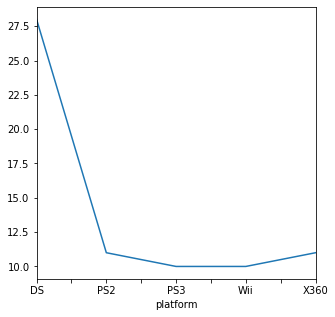

In [101]:
data_top_platform=data.query('platform in @top_platform').pivot_table(index='platform',values='year_of_release',aggfunc={'min','max',})

data_top_platform['term'] = data_top_platform['max']-data_top_platform['min']
display(data_top_platform.sort_values(by='term'))
data_top_platform['term'].plot()



Из 5 платформ с самыми высокими продажами дольше всего продержалась на рынке платформа DS (28 лет),платформа PS2 всего 11 лет, остальные платформы существуют около 10-11 лет,а возможно и дольше (так как массив данных ограничивается 2016 годом,можно предположить,что данные платформы будут пользоваться популярностью и дальше).

In [102]:
data.groupby('year_of_release')['name'].count().describe()

count      37.00
mean      444.43
std       451.60
min         9.00
25%        36.00
50%       338.00
75%       762.00
max     1,427.00
Name: name, dtype: float64

**Вывод**
На основании предоставленных данных количество выпущенных игр растет с 1980 года и достигает пикового значения в 1427 игр,выпущенных за год в 2009 году. Далее количество выпущенных игр уменьшается (возможно после 2009 года игры стали более высокого качества и требуется больше времени или средств на их разработку). В 2016 году было выпущено 502 игры.

Избавившись от выбросов по показателю года,были определены топ - 5 платформ по наибольшей сумме выручки.
Ими стали платформы:'PS2','X360','PS3','Wii','DS'.
Срок действия топовых платформ от 10 лет.
Платформы 'DS' и 'PS2' уже не актуальны, а платформы 'X360','PS3','Wii' возможно будут пользоваться спросом в 2017 году.

Исходя из того,что цель исследования - это спланировать рекламную кампанию на ближайший год (2017),актуальным периодом будут данные с 2014-2016 года.
Так как рынок игр сильно изменичив необходимо выбирать наиболее близкий период к прогнозному.


### Проверка допустимых значений. 
<a id="preprocessing_five_id"></a>

Оставим в таблице только актуальный период.

In [103]:
df=data.query('year_of_release>2014')

Проверим количество пропущенных значений в рассматриваемом периоде.

In [104]:
nan_values(df)

,column_name,num_missing,percent_missing
name,name,0,0.00
platform,platform,0,0.00
year_of_release,year_of_release,0,0.00
genre,genre,0,0.00
na_sales,na_sales,0,0.00
ea_sales,ea_sales,0,0.00
jp_sales,jp_sales,0,0.00
other_sales,other_sales,0,0.00
critic_score,critic_score,651,58.75
user_score,user_score,549,49.55


После определения периода большое количество пропусков образовалось в столбцах critic_score, user_score, rating.Вполне возможно,что оценки еще не проставлены, поэтому заменим critic_score, user_score на 0, а rating на значение unknown, но будем учитывать это при дальнейших исследованиях.

In [105]:
nan_values(df)

,column_name,num_missing,percent_missing
name,name,0,0.00
platform,platform,0,0.00
year_of_release,year_of_release,0,0.00
genre,genre,0,0.00
na_sales,na_sales,0,0.00
ea_sales,ea_sales,0,0.00
jp_sales,jp_sales,0,0.00
other_sales,other_sales,0,0.00
critic_score,critic_score,651,58.75
user_score,user_score,549,49.55


In [106]:
df['name'].value_counts()

LEGO Jurassic World                                      8
Skylanders: SuperChargers                                7
Lego Star Wars: The Force Awakens                        7
LEGO Marvel's Avengers                                   7
Adventure Time: Finn & Jake Investigations               6
                                                        ..
Disney Art Academy                                       1
Uncharted: The Nathan Drake Collection                   1
Moshi, Kono Sekai ni Kami-sama ga Iru to suru Naraba.    1
Dead or Alive Xtreme 3: Venus                            1
Super Dungeon Bros                                       1
Name: name, Length: 654, dtype: int64

Приведем столбец с наименованием игр к нижнему регистру и проверим на наличие дубликатов

In [107]:
df['name'] = df['name'].str.lower()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
df['name'].value_counts()

lego jurassic world                          8
lego marvel's avengers                       7
lego star wars: the force awakens            7
skylanders: superchargers                    7
just dance 2016                              6
                                            ..
taishou x alice: all in one                  1
tokyo xanadu ex+                             1
doramoji: nobita no kanji daisakusen         1
the legend of zelda: twilight princess hd    1
disney magic world 2                         1
Name: name, Length: 654, dtype: int64

In [109]:
df[df['name']=='lego star wars: the force awakens']

,name,platform,year_of_release,genre,na_sales,ea_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
2917,lego star wars: the force awakens,PS4,2016,Action,0.16,0.43,0.01,0.11,78.00,7.50,E10+,0.71
5926,lego star wars: the force awakens,XOne,2016,Action,0.14,0.13,0.00,0.02,76.00,7.00,E10+,0.29
8566,lego star wars: the force awakens,PS3,2016,Action,0.04,0.10,0.00,0.03,nan,nan,E10+,0.17
8943,lego star wars: the force awakens,WiiU,2016,Action,0.06,0.07,0.01,0.01,74.00,8.00,E10+,0.15
9719,lego star wars: the force awakens,3DS,2016,Action,0.04,0.07,0.01,0.01,nan,7.80,E10+,0.13
9806,lego star wars: the force awakens,X360,2016,Action,0.05,0.06,0.00,0.01,nan,6.90,E10+,0.12
10819,lego star wars: the force awakens,PSV,2016,Action,0.01,0.06,0.01,0.02,nan,7.10,E10+,0.10


По наименованию игр количество уникальных значений не изменилось после приведения наименований к нижнему регистру. Повторения в наименованиях объясняются тем,что популярные игры создаются на разных платформах.

Выполним проверку по столбцу с наименованием платформ.

In [110]:
df['platform'].value_counts()

PS4     301
PSV     195
XOne    167
3DS     132
PS3     111
PC      104
X360     48
WiiU     42
Wii       5
PSP       3
Name: platform, dtype: int64

Платформа Wii вызывает сомнения,но так как Wii и Wii U это 2 разных типа платформ,оставим обе.
Изучим значения в колонке жанр.

In [111]:
df['genre'].value_counts()

Action          431
Role-Playing    132
Adventure       110
Sports          107
Shooter          81
Misc             71
Racing           42
Fighting         37
Simulation       33
Strategy         29
Platform         28
Puzzle            7
Name: genre, dtype: int64

In [112]:
df['rating'].value_counts()

unknown    513
T          192
E          153
M          149
E10+       101
Name: rating, dtype: int64

**Вывод**
При проверке допустимых значений за анализируемый период (2014-2016 года) "артефактов" не обнаружено.

## Исследовательский анализ данных
<a id="analysis_id"></a>

Выберем несколько потенциально прибыльных платформ и ответим на вопрос: Какие платформы лидируют по продажам, растут или падают? 


In [113]:
df.pivot_table(index='platform',values='sales',aggfunc={'sum'}).sort_values(by='sum',ascending=False).head()

,sum
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42


In [114]:
top_platform=['PS4','XOne','3DS','PC','WiiU']

In [115]:
sales_top_platform =data.query('platform in @top_platform and year_of_release > 2013').pivot_table(index='year_of_release',columns='platform',values='sales',aggfunc={'sum'}).reset_index()

display(sales_top_platform.head())



year_of_release   sum                         
platform                   3DS    PC    PS4  WiiU  XOne
0                   2014 43.76 13.28 100.00 22.03 54.07
1                   2015 27.78  8.52 118.90 16.35 60.14
2                   2016 15.14  5.25  69.25  4.60 26.15

([<matplotlib.axis.XTick at 0x7f84ced6a090>,
 <a list of 3 Text xticklabel objects>)

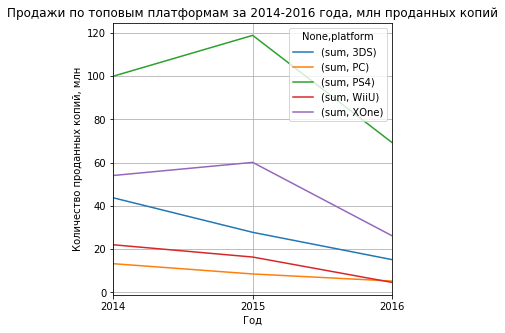

In [116]:
data.query('platform in @top_platform and year_of_release > 2013').pivot_table(index='year_of_release',columns='platform',values='sales',aggfunc={'sum'}).plot(grid=True)

plt.ylabel("Количество проданных копий, млн")
plt.xlabel("Год")
plt.title("Продажи по топовым платформам за 2014-2016 года, млн проданных копий")
plt.xticks([2014,2015,2016])


Самые продаваемые платформы в период с 2014 - 2016 год это PS4, XOne, 3DS,но количество проданных копий к 2016 году идет на снижение.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам за 2016 год.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



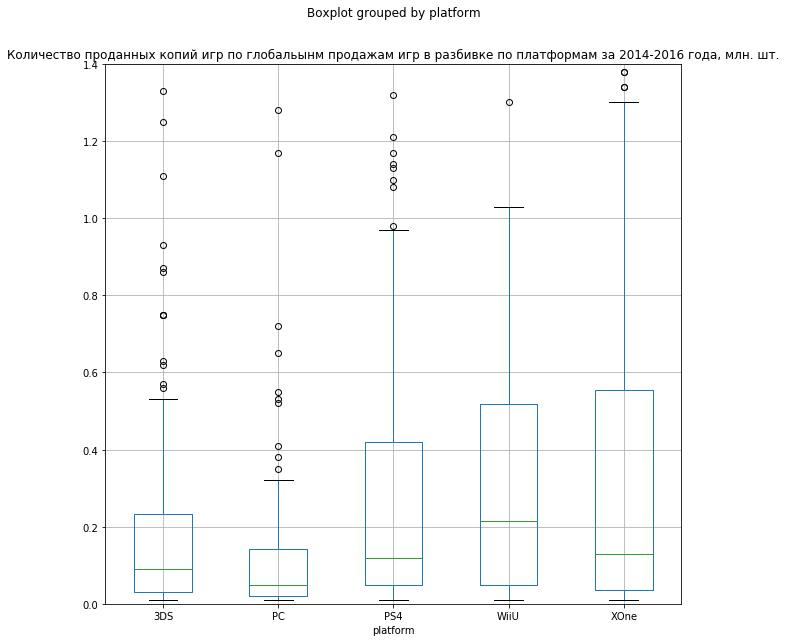

In [117]:
df.query('platform in@top_platform').boxplot(column='sales',by='platform',figsize=(10,10))
plt.ylim(0, 1.4)
plt.title("Количество проданных копий игр по глобальынм продажам игр в разбивке по платформам за 2014-2016 года, млн. шт.")
plt.show()


Самый большой разброс по продаваемым копиям мы наблюдаем по платформе XOne, наибольшим количеством копий продаются игры на платформе WIIU,далее идут игры на платформе 3DS и XOne, самое минимальное количество копий продается по играм на платформе PC. Данный показатель может отражать увеличение и уменьшение спроса на игры для платформы.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [118]:
df.query('platform=="PS4"').pivot_table(index='name',values=['user_score','critic_score','sales'],aggfunc='mean').corr()

,critic_score,sales,user_score
critic_score,1.00,0.39,0.53
sales,0.39,1.00,-0.06
user_score,0.53,-0.06,1.00


Text(0.5, 1.0, 'Зависимость между продажами игр на платформе PS4 и оценкой критиков')

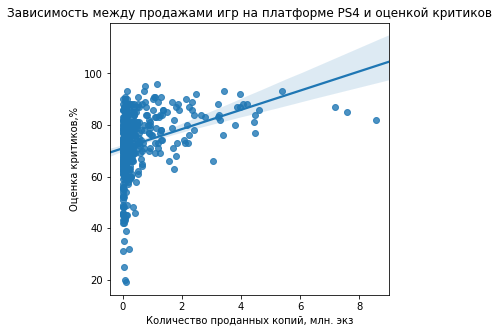

In [119]:
sns.regplot(x=df["sales"], y=df["critic_score"], data=df.query('platform=="PS4"'))

plt.ylabel("Оценка критиков,%")
plt.xlabel("Количество проданных копий, млн. экз")
plt.title("Зависимость между продажами игр на платформе PS4 и оценкой критиков")

Text(0.5, 1.0, 'Зависимость между продажами игр на платформе PS4 и оценкой пользователей')

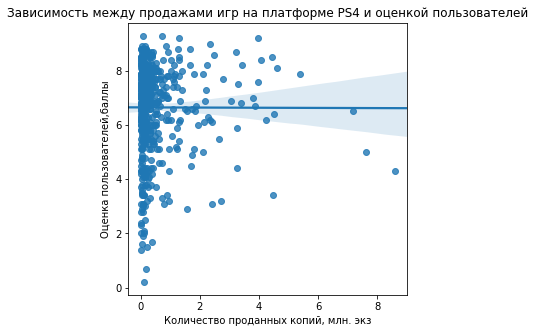

In [120]:
sns.regplot(x=df["sales"], y=df["user_score"],data=df.query('platform=="PS4"'))

plt.ylabel("Оценка пользователей,баллы")
plt.xlabel("Количество проданных копий, млн. экз")
plt.title("Зависимость между продажами игр на платформе PS4 и оценкой пользователей")

In [121]:
df.query('platform=="XOne"').pivot_table(index='name',values=['user_score','critic_score','sales'],aggfunc='mean').corr()

,critic_score,sales,user_score
critic_score,1.00,0.43,0.46
sales,0.43,1.00,-0.04
user_score,0.46,-0.04,1.00


Text(0.5, 1.0, 'Зависимость между продажами игра на платформе XOne и оценкой критиков')

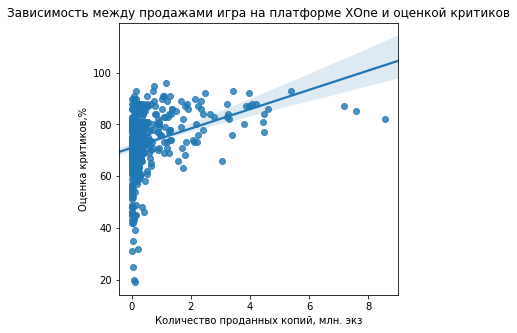

In [122]:
sns.regplot(x=df["sales"], y=df["critic_score"], data=df.query('platform=="XOne"'))

plt.ylabel("Оценка критиков,%")
plt.xlabel("Количество проданных копий, млн. экз")
plt.title("Зависимость между продажами игра на платформе XOne и оценкой критиков")

Text(0.5, 1.0, 'Зависимость между продажами игра на платформе XOne и оценкой пользователей')

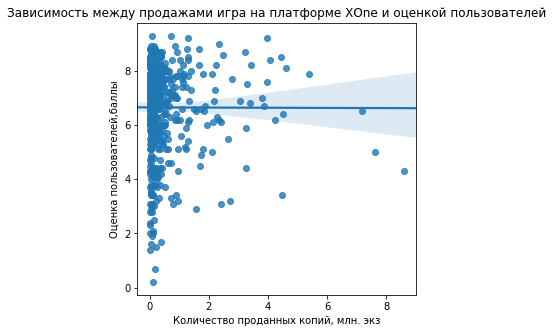

In [123]:
sns.regplot(x=df["sales"], y=df["user_score"],data=df.query('platform=="XOne"'))

plt.ylabel("Оценка пользователей,баллы")
plt.xlabel("Количество проданных копий, млн. экз")
plt.title("Зависимость между продажами игра на платформе XOne и оценкой пользователей")

In [124]:
df.query('platform=="3DS"').pivot_table(index='name',values=['user_score','critic_score','sales'],aggfunc={'mean'}).corr()

,,critic_score,sales,user_score
,,mean,mean,mean
critic_score,mean,1.00,0.18,0.79
sales,mean,0.18,1.00,0.20
user_score,mean,0.79,0.20,1.00


Text(0.5, 1.0, 'Зависимость между продажами игра на платформе 3DS и оценкой критиков')

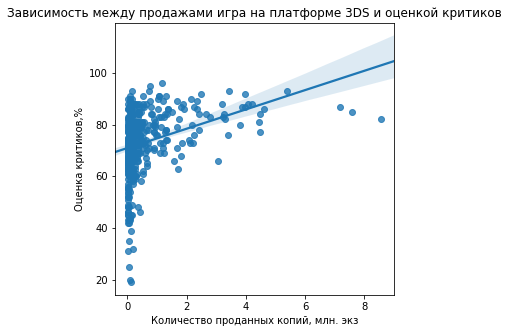

In [125]:
sns.regplot(x=df["sales"], y=df["critic_score"], data=df.query('platform=="3DS"'))

plt.ylabel("Оценка критиков,%")
plt.xlabel("Количество проданных копий, млн. экз")
plt.title("Зависимость между продажами игра на платформе 3DS и оценкой критиков")

Text(0.5, 1.0, 'Зависимость между продажами игра на платформе 3DS и оценкой пользователей')

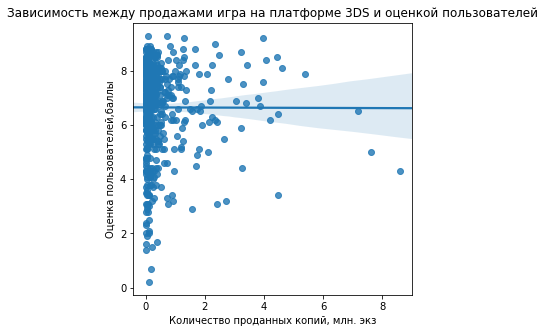

In [126]:
sns.regplot(x=df["sales"], y=df["user_score"],data=df.query('platform=="3DS"'))

plt.ylabel("Оценка пользователей,баллы")
plt.xlabel("Количество проданных копий, млн. экз")
plt.title("Зависимость между продажами игра на платформе 3DS и оценкой пользователей")

In [127]:
df.query('platform=="WiiU"').pivot_table(index='name',values=['user_score','critic_score','sales'],aggfunc='mean').corr()

,critic_score,sales,user_score
critic_score,1.00,0.32,0.68
sales,0.32,1.00,0.36
user_score,0.68,0.36,1.00


Text(0.5, 1.0, 'Зависимость между продажами игра на платформе WiiU и оценкой критиков')

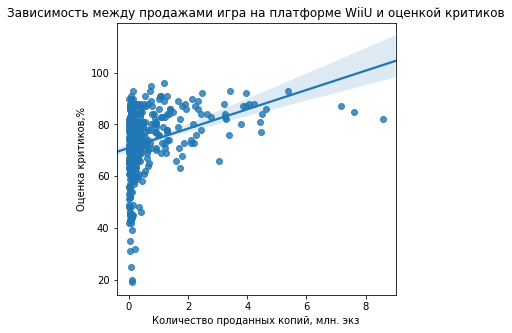

In [128]:
sns.regplot(x=df["sales"], y=df["critic_score"], data=df.query('platform=="WiiU"'))

plt.ylabel("Оценка критиков,%")
plt.xlabel("Количество проданных копий, млн. экз")
plt.title("Зависимость между продажами игра на платформе WiiU и оценкой критиков")

Text(0.5, 1.0, 'Зависимость между продажами игра на платформе WiiU и оценкой пользователей')

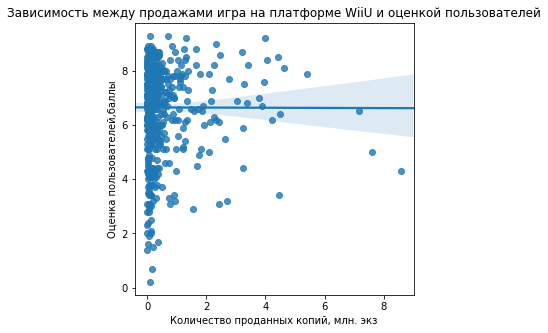

In [129]:
sns.regplot(x=df["sales"], y=df["user_score"],data=df.query('platform=="WiiU"'))

plt.ylabel("Оценка пользователей,баллы")
plt.xlabel("Количество проданных копий, млн. экз")
plt.title("Зависимость между продажами игра на платформе WiiU и оценкой пользователей")

In [130]:
df.query('platform=="PC"').pivot_table(index='name',values=['user_score','critic_score','sales'],aggfunc='mean').corr()

,critic_score,sales,user_score
critic_score,1.00,0.38,0.48
sales,0.38,1.00,0.15
user_score,0.48,0.15,1.00


Исходя из диаграмм рассеяния и корреляции в 0,29 по проданным играм по платформе PS4 можно предположить,что оценка пользователей и критиков оказывает влияние на продажи игр. По платформе XOne наблюдается еще большее влияние на продажи (корреляция 0,41).
Самое большое влияние оценок по выявлено по платформам WiiU(корреляция 0,89) и 3DS (корреляция 0,8).

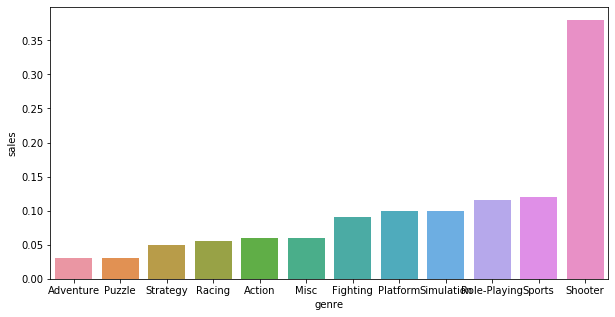

Text(0.5, 1.0, 'Продажи по жанрам за 2014-2016 года')

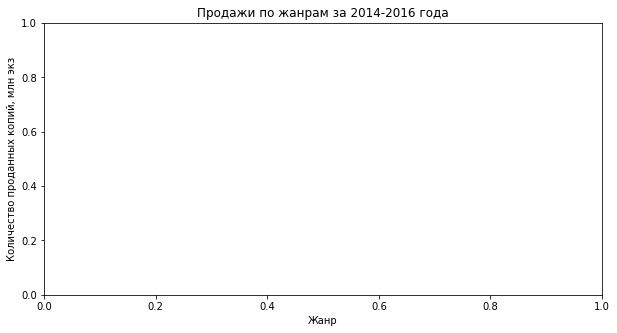

In [154]:
#df.pivot_table(index='genre',values=['sales'],aggfunc='median').sort_values(by='sales').hist()
ax = sns.barplot(x="genre", y="sales",data=df.pivot_table(index='genre',values=['sales'],aggfunc='median').sort_values(by='sales').reset_index()) 
plt.rcParams['figure.figsize']=10,5
plt.show()
plt.ylabel("Количество проданных копий, млн экз")
plt.xlabel("Жанр")
plt.title("Продажи по жанрам за 2014-2016 года")

Успехом у игроков пользуются жанры Shooter,Sports,Role-Playing,Simulation,Platform,Fighting остальные жанры пользуются меньшим спросом.

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5).

In [132]:
data_na_sales_platform = data.groupby('platform').sum().sort_values(by=['na_sales'],ascending=False)['na_sales'].head().reset_index()
data_na_sales_platform['share_na']= data_na_sales_platform['na_sales']/data['na_sales'].sum()
print(data_na_sales_platform)

data_ea_sales_platform = data.groupby('platform').sum().sort_values(by=['ea_sales'],ascending=False)['ea_sales'].head().reset_index()
data_ea_sales_platform['share_ea']= data_ea_sales_platform['ea_sales']/data['ea_sales'].sum()
print(data_ea_sales_platform)

data_jp_sales_platform = data.groupby('platform').sum().sort_values(by=['jp_sales'],ascending=False)['jp_sales'].head().reset_index()
data_jp_sales_platform['share_jp']= data_jp_sales_platform['jp_sales']/data['jp_sales'].sum()
print(data_jp_sales_platform)


  platform  na_sales  share_na
0     X360    595.74      0.14
1      PS2    572.92      0.13
2      Wii    486.87      0.11
3      PS3    390.13      0.09
4       DS    380.31      0.09
  platform  ea_sales  share_ea
0      PS2    332.63      0.14
1      PS3    327.21      0.14
2     X360    268.32      0.11
3      Wii    258.32      0.11
4       PS    212.39      0.09
  platform  jp_sales  share_jp
0       DS    175.02      0.14
1       PS    139.78      0.11
2      PS2    137.54      0.11
3     SNES    116.55      0.09
4      3DS    100.62      0.08


In [133]:
pivot_platform = data_na_sales_platform.merge(data_ea_sales_platform,on=['platform'], how='outer')
pivot_platform = pivot_platform.merge(data_jp_sales_platform,on=['platform'], how='outer')
display(pivot_platform)

,platform,na_sales,share_na,ea_sales,share_ea,jp_sales,share_jp
0,X360,595.74,0.14,268.32,0.11,nan,nan
1,PS2,572.92,0.13,332.63,0.14,137.54,0.11
2,Wii,486.87,0.11,258.32,0.11,nan,nan
3,PS3,390.13,0.09,327.21,0.14,nan,nan
4,DS,380.31,0.09,nan,nan,175.02,0.14
5,PS,nan,nan,212.39,0.09,139.78,0.11
6,SNES,nan,nan,nan,nan,116.55,0.09
7,3DS,nan,nan,nan,nan,100.62,0.08


Text(0.5, 1.0, 'Продажи по платформам за 2016 год в Японии')

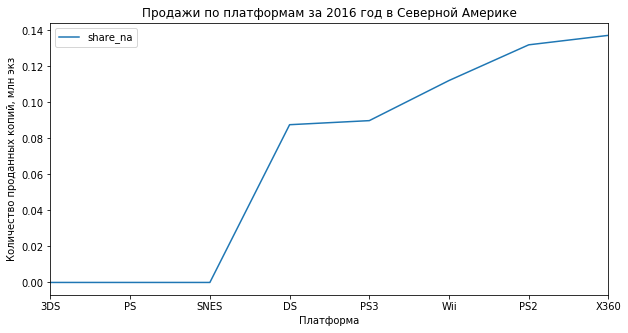

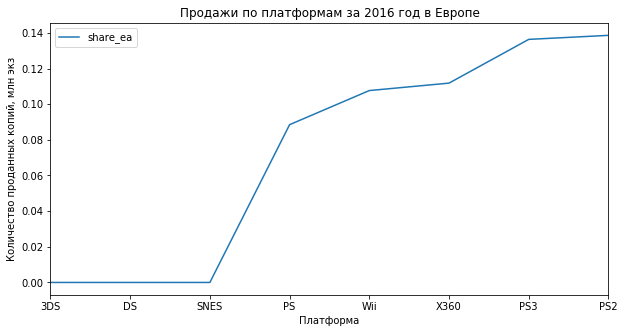

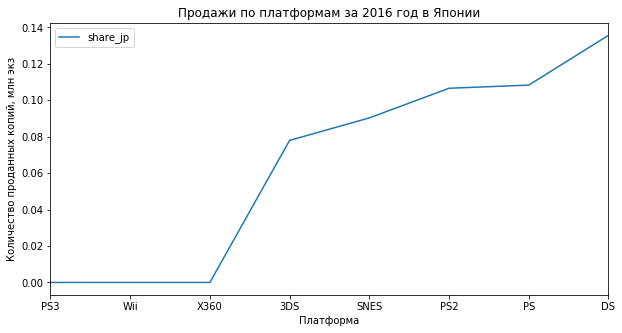

In [155]:
pivot_platform.pivot_table(index='platform',values=['share_na'],aggfunc='sum').sort_values(by='share_na').plot()
plt.ylabel("Количество проданных копий, млн экз")
plt.xlabel("Платформа")
plt.title("Продажи по платформам за 2016 год в Северной Америке")

pivot_platform.pivot_table(index='platform',values=['share_ea'],aggfunc='sum').sort_values(by='share_ea').plot()
plt.ylabel("Количество проданных копий, млн экз")
plt.xlabel("Платформа")
plt.title("Продажи по платформам за 2016 год в Европе")
pivot_platform.pivot_table(index='platform',values=['share_jp'],aggfunc='sum').sort_values(by='share_jp').plot()
plt.ylabel("Количество проданных копий, млн экз")
plt.xlabel("Платформа")
plt.title("Продажи по платформам за 2016 год в Японии")

- X360 популярна в Северной Америке, менее популярна в Европе и почти не пользуется спросом в Японии.
- PS почти не используют в Северной Америке, но имеет популярность среди японцев и европейцев.
- PS2 пользуется популярностью во всех регионах.
- SNES и 3DS популярны только в Японии.
- Wii популярна в Северной Америке и Европе.



Определим самые популярные жанры (топ-5)

In [135]:
data_na_sales = data.groupby('genre').sum().sort_values(by=['na_sales'],ascending=False)['na_sales'].head().reset_index()
data_na_sales['share_na']= data_na_sales['na_sales']/data['na_sales'].sum()
print(data_na_sales)

data_ea_sales = data.groupby('genre').sum().sort_values(by=['ea_sales'],ascending=False)['ea_sales'].head().reset_index()
data_ea_sales['share_ea']= data_ea_sales['ea_sales']/data['ea_sales'].sum()
print(data_ea_sales)

data_jp_sales = data.groupby('genre').sum().sort_values(by=['jp_sales'],ascending=False)['jp_sales'].head().reset_index()
data_jp_sales['share_jp']= data_jp_sales['jp_sales']/data['jp_sales'].sum()
print(data_jp_sales)



      genre  na_sales  share_na
0    Action    863.17      0.20
1    Sports    671.20      0.15
2   Shooter    584.83      0.13
3  Platform    444.44      0.10
4      Misc    399.57      0.09
     genre  ea_sales  share_ea
0   Action    510.99      0.21
1   Sports    371.33      0.15
2  Shooter    314.52      0.13
3   Racing    234.49      0.10
4     Misc    210.60      0.09
          genre  jp_sales  share_jp
0  Role-Playing    353.39      0.27
1        Action    160.14      0.12
2        Sports    134.93      0.10
3      Platform    130.71      0.10
4          Misc    107.02      0.08


In [136]:
pivot_genre = data_na_sales.merge(data_ea_sales,on=['genre'], how='outer')
pivot_genre = pivot_genre.merge(data_jp_sales,on=['genre'], how='outer')
display(pivot_genre)

,genre,na_sales,share_na,ea_sales,share_ea,jp_sales,share_jp
0,Action,863.17,0.20,510.99,0.21,160.14,0.12
1,Sports,671.20,0.15,371.33,0.15,134.93,0.10
2,Shooter,584.83,0.13,314.52,0.13,nan,nan
3,Platform,444.44,0.10,nan,nan,130.71,0.10
4,Misc,399.57,0.09,210.60,0.09,107.02,0.08
5,Racing,nan,nan,234.49,0.10,nan,nan
6,Role-Playing,nan,nan,nan,nan,353.39,0.27


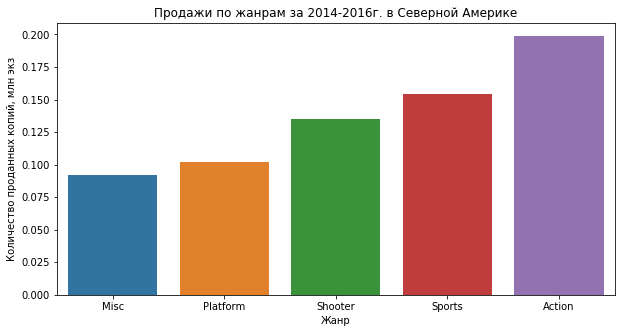

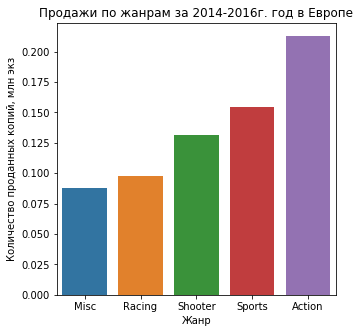

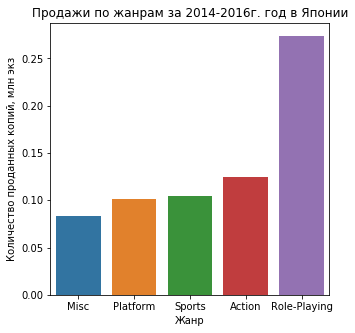

In [156]:
ax = sns.barplot(x="genre", y="share_na",data=pivot_genre.pivot_table(index='genre',values=['share_na'],aggfunc='median').sort_values(by='share_na').reset_index())
plt.ylabel("Количество проданных копий, млн экз")
plt.xlabel("Жанр")
plt.title("Продажи по жанрам за 2014-2016г. в Северной Америке")
plt.rcParams['figure.figsize']=5,5
plt.show()

bx = sns.barplot(x="genre", y="share_ea",data=pivot_genre.pivot_table(index='genre',values=['share_ea'],aggfunc='median').sort_values(by='share_ea').reset_index())
plt.ylabel("Количество проданных копий, млн экз")
plt.xlabel("Жанр")
plt.title("Продажи по жанрам за 2014-2016г. год в Европе")
plt.rcParams['figure.figsize']=5,5
plt.show()

bx = sns.barplot(x="genre", y="share_jp",data=pivot_genre.pivot_table(index='genre',values=['share_jp'],aggfunc='median').sort_values(by='share_jp').reset_index())
plt.ylabel("Количество проданных копий, млн экз")
plt.xlabel("Жанр")
plt.title("Продажи по жанрам за 2014-2016г. год в Японии")
plt.rcParams['figure.figsize']=5,5
plt.show()

- Жанр Action и Sport популярны во всех регионах.
- Role-Playing самый популярный для пользователей Японии и совсем не популярен в Северной Америке и Европе.
- Shooter на 3 месте рейтинга пользователей Северной Америки и Европы.
- Music на 5 месте рейтинга среди всех стран
- Racing занимает 4 место в Европе
- Platform на 4 позиции в Японии



Проверим влияние рейтинга.

In [138]:
data_na_sales_rating = data.groupby('rating').sum().sort_values(by=['na_sales'],ascending=False)['na_sales'].head().reset_index()
data_na_sales_rating['share_na']= data_na_sales_rating['na_sales']/data['na_sales'].sum()
print(data_na_sales_rating)

data_ea_sales_rating = data.groupby('rating').sum().sort_values(by=['ea_sales'],ascending=False)['ea_sales'].head().reset_index()
data_ea_sales_rating['share_ea']= data_ea_sales_rating['ea_sales']/data['ea_sales'].sum()
print(data_ea_sales_rating)

data_jp_sales_rating = data.groupby('rating').sum().sort_values(by=['jp_sales'],ascending=False)['jp_sales'].head().reset_index()
data_jp_sales_rating['share_jp']= data_jp_sales_rating['jp_sales']/data['jp_sales'].sum()
print(data_jp_sales_rating)

    rating  na_sales  share_na
0        E  1,274.24      0.29
1  unknown  1,225.84      0.28
2        T    747.60      0.17
3        M    742.89      0.17
4     E10+    345.50      0.08
    rating  ea_sales  share_ea
0        E    703.87      0.29
1  unknown    609.65      0.25
2        M    480.00      0.20
3        T    421.79      0.18
4     E10+    183.35      0.08
    rating  jp_sales  share_jp
0  unknown    836.74      0.65
1        E    197.96      0.15
2        T    150.70      0.12
3        M     63.58      0.05
4     E10+     40.20      0.03


In [139]:
pivot_rating = data_na_sales_rating.merge(data_ea_sales_rating,on=['rating'], how='outer')
pivot_rating = pivot_rating.merge(data_jp_sales_rating,on=['rating'], how='outer')
display(pivot_rating)

,rating,na_sales,share_na,ea_sales,share_ea,jp_sales,share_jp
0,E,"1,274.24",0.29,703.87,0.29,197.96,0.15
1,unknown,"1,225.84",0.28,609.65,0.25,836.74,0.65
2,T,747.60,0.17,421.79,0.18,150.70,0.12
3,M,742.89,0.17,480.00,0.20,63.58,0.05
4,E10+,345.50,0.08,183.35,0.08,40.20,0.03


Text(0.5, 1.0, 'Продажи по рейтингу за 2016 год в Японии')

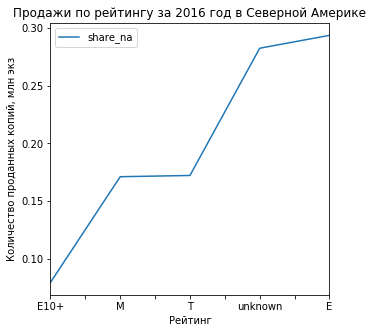

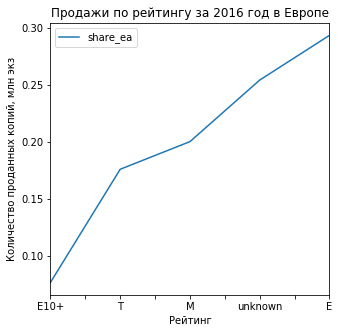

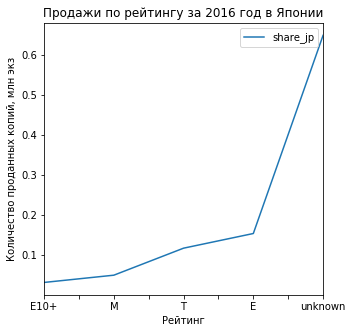

In [157]:
pivot_rating.pivot_table(index='rating',values=['share_na'],aggfunc='mean').sort_values(by='share_na').plot()
plt.ylabel("Количество проданных копий, млн экз")
plt.xlabel("Рейтинг")
plt.title("Продажи по рейтингу за 2016 год в Северной Америке")

pivot_rating.pivot_table(index='rating',values=['share_ea'],aggfunc='mean').sort_values(by='share_ea').plot()
plt.ylabel("Количество проданных копий, млн экз")
plt.xlabel("Рейтинг")
plt.title("Продажи по рейтингу за 2016 год в Европе")
pivot_rating.pivot_table(index='rating',values=['share_jp'],aggfunc='mean').sort_values(by='share_jp').plot()
plt.ylabel("Количество проданных копий, млн экз")
plt.xlabel("Рейтинг")
plt.title("Продажи по рейтингу за 2016 год в Японии")

Во всех трех регионах большим спросом пользуются игры для всех возрастов категории Е. Далее популярны игры для подростков (категория Т) и взрослых (категория М) в Северной Америке и в Европе. В Японии игры для подростков пользуются большим спросом,игры для взрослых менее распространены.

Выполним проверку гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза будет звучать так: Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [141]:
alpha=0.05
pc=df.query('platform=="PC" & user_score!=0')['user_score']
xone=df.query('platform=="XOne" & user_score!=0')['user_score']
results = st.ttest_ind(pc, xone,equal_var = False, nan_policy='omit')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print(df.query('platform=="PC"')['user_score'].mean())
print(df.query('platform=="XOne"')['user_score'].mean())


p-значение:  0.29463086198872473
Не получилось отвергнуть нулевую гипотезу
6.2964287
6.542149


Выполним проверку гипотезы о том,что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны. Альтернативная гипотеза будет о том,что они разные.

In [142]:
action = df.query('genre=="Action" & user_score!=0')['user_score']
sports=df.query('genre=="Sports" & user_score!=0')['user_score']
results = st.ttest_ind(action,sports,equal_var = False,nan_policy='omit')
alpha=0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    
print(df.query('genre=="Action"')['user_score'].mean())  
print(df.query('genre=="Sports"')['user_score'].mean())  

p-значение:  5.971616292622786e-10
Отвергаем нулевую гипотезу
6.80829
5.1987805


**Вывод**

В рамках исследования были изучены показатели:

`1.` Топ самых продаваемых платформ в 2014-2016 годах - PS4, XOne, 3DS;

`2.` Влияние оценки пользователей и критиков на продажи - оценки критиков и пользователей оказывают влияние на продажи (корреляция от 0,29 до 0,89);

`3.` Топ 5 самых популярных жанров в 2014-2016 годах - Action, Role-Playing. Puzzle, Simulation, Racing;

`4.` Различие предпочтений в платформах покупателей в Северной Америке, Европе и Японии;

- `Северная Америка` - Action,Sport,Shooter,Platform,Music;
- `Европа` - Action,Sport,Shooter,Racing, Music;
- `Япония` - Role-Playing,Action,Sport,Platform,Music;

`5.` Различие предпочтений в выборе жанра покупателей в Северной Америке, Европе и Японии;

- `Северная Америка` - X360,PS2,Wii,PS3,DS
- `Европа` - PS2, PS3, X360, Wii, PS
- `Япония` - DS, PS, PS2, SNES, 3DS


`6.` Рейтинг ESRB оказывает влияние на продажи в Японии, игры для взрослых менее распространены, чем игры всех категорий и подростков.В Северной Америке и Европе самые популярные игры для всех, далее игры для подростков и взрослых.

Была выполнена проверка гипотез:

**Гипотеза 1**
`Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.`
Нулевая гипотеза не была отвергнута (p-значение = 0.29463086198872473)


**Гипотеза 2**
`Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.` 
Нулевая гипотеза была отвергнута (p-значение = 5.971616292622786e-10)

На основании выполненной проверки мы можем предположить,что альтернативная гипотеза о том, что пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различны.

## Общий вывод
<a id="conclusion_id"></a>

В результате исследования были изучены продажи компьютерных игр с 1980 года по 2016 год в разрезе жанров,платформ,оценок пользователей,критиков, рейтинга ESRB, количества проданных копий.
Пик по количеству продаваемых игр приходится на 2008 год (1427 млн продаваемых копий).

Так как целью исследования является прогнозирование продаж в 2017 году и изучения,факторов,которые влияют на продажи для анализа был выбран 2016 год, в связи с тем,что рынок копьютерных игр меняется в зависимости от произведенных платформ и прорыва в разработках.

При планировании продаж следует увеличивать рейтинги критиков и пользователей.
Особое внимание следует обратить на увеличение рейтинга по платформам WiiU и 3DS, так как корреляция отзывов и продаж по данным платформам самая высокая и составляет 0,89 и 0,8 соответственно.

Также, следует сделать акцент на продаж игр по следущим жанрам: Action, Role-Playing. Puzzle, Simulation, Racing;
При планировании маркетинговой стратегии следует учивать особенности пользователей каждой страны.
Для `Северной Америке` - Action,Sport,Shooter,Platform,Music, для `Европы` - Action,Sport,Shooter,Racing, Music, для `Японии` - Role-Playing,Action,Sport,Platform,Music.

По платформам предпочтения следует отдать платформам: PS4, XOne, 3DS.
Для `Северной Америке` - X360,PS2,Wii,PS3,DS для `Европы` - PS2, PS3, X360, Wii, PS, для `Японии` - DS, PS, PS2, SNES, 3DS.

Рейтинг ESRB оказывает влияние на продажи в Японии, игры для взрослых менее распространены, чем игры всех категорий и подростков.В Северной Америке и Европе самые популярные игры для всех, далее игры для подростков и взрослых.

В рамках исседования были выполнены проверки 2 гипотез:

`Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.`
При проверке двух генеральных совокупностей гипотеза о том средний пользовательский рейтинг по платформам Xbox One и PC равен не была отвергнута с вероятностью в 29%, следовательно можно предположить,что средние пользовательские рейтинги равны.

`Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.` 
При проверке двух генеральных совокупностей гипотеза о том, что средний пользовательский рейтинг по жанру Action равен рейтингу по жанру Sports не была подтверждена (с вероятностью 5.971616292622786e-10).Следовательно можно предположить,что они различны.
